In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np

In [34]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [73]:
X_test.shape

(10000, 28, 28)

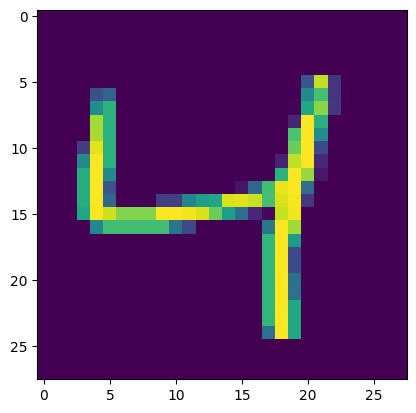

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [37]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [38]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/home/reshni/py3_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Define callbacks
checkpoint = ModelCheckpoint("minist.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/25
1492/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.5182
Epoch 1: val_accuracy improved from -inf to 0.95533, saving model to minist.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8482 - loss: 0.5169 - val_accuracy: 0.9553 - val_loss: 0.1592
Epoch 2/25
1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9595 - loss: 0.1358
Epoch 2: val_accuracy improved from 0.95533 to 0.96450, saving model to minist.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9595 - loss: 0.1357 - val_accuracy: 0.9645 - val_loss: 0.1154
Epoch 3/25
1480/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0857
Epoch 3: val_accuracy improved from 0.96450 to 0.96717, saving model to minist.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9738 - loss: 0.0858 - val_accuracy: 0.9672 - val_loss: 0.1064
Epoch 4/25
1467/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9809 - loss: 0.0623
Epoch 4: val_accuracy improved from 0.9

In [41]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


0.9738

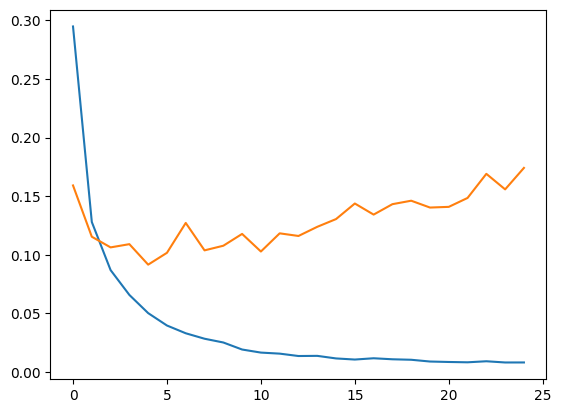

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

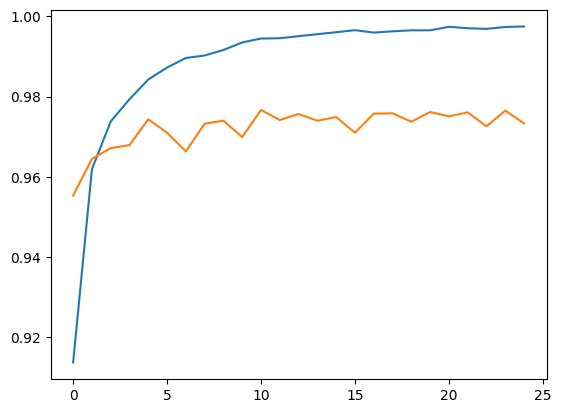

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

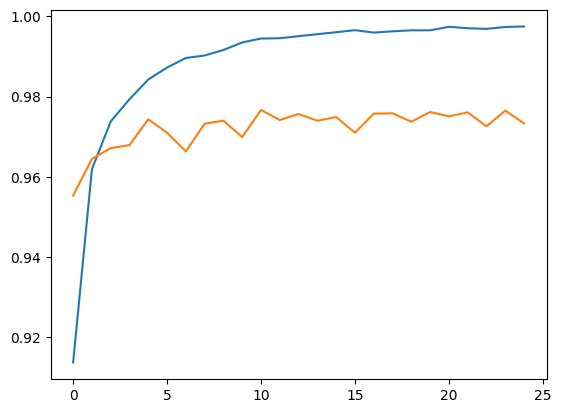

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
3
3


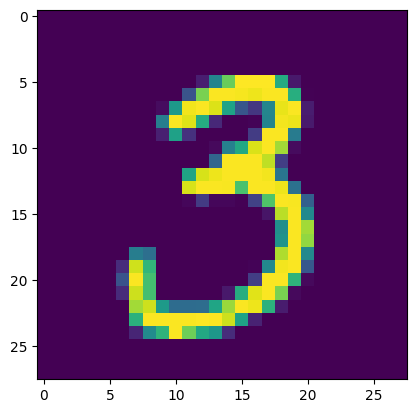

In [69]:
#model.predict(X_test[1])
index=90
import matplotlib.pyplot as plt
plt.imshow(X_test[index])
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
print(y_pred[index])
print(y_test[index])